In [36]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from experiments2.auxiliary.auxiliary import construct_by_kmeans
from pgmpy.estimators import K2Score

imagespath = 'C:/Users/Acer/PycharmProjects/BAMTfork/experiments3'

In [41]:
data = pd.DataFrame()
n = 3000
np.random.seed(42)
data["X1"] = np.random.normal(loc = 4, scale=4, size=n)
data["X2"] = np.random.normal(loc=4, scale=3, size=n)*np.abs(data["X1"])+data["X1"]
data = data[data["X1"]>0]
data

,X1,X2
0,5.986857,-4.331028
1,3.446943,8.337620
2,6.590754,24.775854
3,10.092119,107.612905
4,3.063387,20.431744
...,...,...
2994,0.192326,1.459868
2995,4.309922,23.766669
2996,5.031010,42.552004
2998,5.336706,34.175469


<AxesSubplot: xlabel='X1', ylabel='X2'>

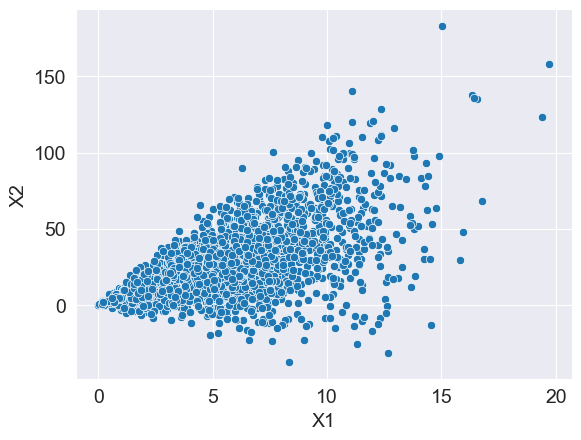

In [42]:
sns.scatterplot(x=data["X1"], y=data["X2"])

In [43]:
model = LinearRegression()
model.fit(data["X1"].values.reshape(-1, 1), data["X2"])

LinearRegression()

In [44]:
model.coef_, model.intercept_

(array([4.80894831]), 0.29615977098782764)

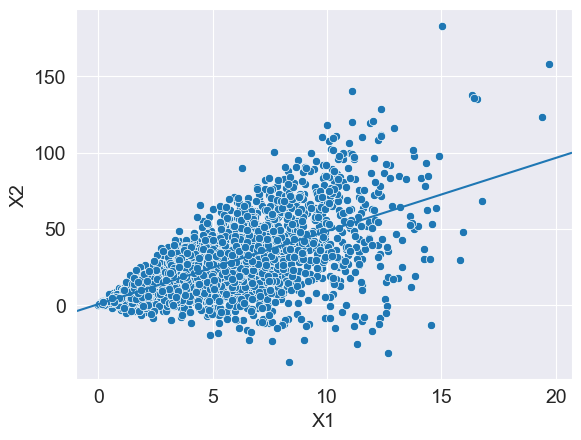

In [45]:
sns.scatterplot(x=data["X1"], y=data["X2"])
plt.axline((0, model.intercept_), slope=model.coef_[0])

In [46]:
kresult = construct_by_kmeans(data, [], scoring=("K2", K2Score))

In [47]:
kresult

{'bn': <bamt.networks.discrete_bn.DiscreteBN at 0x1f573aac100>,
 'encoder': KBinsDiscretizer(n_bins=3, random_state=42, strategy='kmeans'),
 'categories': ['X10', 'X11', 'X12', 'X20', 'X21', 'X22'],
 'disc_data':       X10  X11  X12  X20  X21  X22
 0       0    1    0    1    0    0
 1       1    0    0    1    0    0
 2       0    1    0    0    1    0
 3       0    0    1    0    0    1
 4       1    0    0    1    0    0
 ...   ...  ...  ...  ...  ...  ...
 2557    1    0    0    1    0    0
 2558    0    1    0    0    1    0
 2559    0    1    0    0    1    0
 2560    0    1    0    0    1    0
 2561    1    0    0    1    0    0
 
 [2562 rows x 6 columns]}

In [48]:
bn = kresult["bn"]

In [49]:
c=bn.plot2(imagespath, "regression.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [56]:
data_residuals = data.copy(deep=True)
data_residuals["X2"] = np.abs(data["X2"]-model.predict(data["X1"].values.reshape(-1, 1)))
data_residuals.head()

,X1,X2
0,5.986857,33.417672
1,3.446943,8.534709
2,6.590754,7.214902
3,10.092119,58.784265
4,3.063387,5.403917


In [57]:
kresultresid = construct_by_kmeans(data_residuals, [], scoring=("K2", K2Score))

In [58]:
c=kresultresid["bn"].plot2(imagespath, "residuals.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
